In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

# Preliminary Analysis of dataset: Product Launch Dataset

In [2]:
print("creating the dataframe from Product_Launch_Dataset.csv file..")
df_product_launch = pd.read_csv('Product_Launch_Dataset.csv')
print('Done.\n')

creating the dataframe from Product_Launch_Dataset.csv file..
Done.



In [3]:
df_product_launch.head(5)

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,01-01-2001,WE1,West Europe,"Low Calorie, Natural"
1,2,"Fruit, not specified",Carbonates,01-01-2001,WE2,West Europe,Convenience - Consumption
2,3,Lemon; Honey; Ginger,Juice & Juice Drinks,01-01-2001,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu..."
3,4,Mango; Passion Fruit,Juice & Juice Drinks,01-01-2001,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu..."
4,5,Mango,Juice & Juice Drinks,01-01-2001,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu..."


In [4]:
df_product_launch.shape

(114689, 7)

##### Basic Stats:

In [5]:
print("Total data ")
print("-"*50)
print("\nTotal No of products :",len(np.unique(df_product_launch["Product id"])))
print("Total No of Market Subcategories:", len(np.unique(df_product_launch["Market Subcategory"])))
print("Total No of Countries  :", len(np.unique(df_product_launch["Country"])))
print("Total No of Regions  :", len(np.unique(df_product_launch["Region"])))

Total data 
--------------------------------------------------

Total No of products : 114689
Total No of Market Subcategories: 14
Total No of Countries  : 108
Total No of Regions  : 8


##### Data Quality Check:
- Check for duplicates: if product ids are same for two products
- Check and validate NaN values 

In [6]:
dup_bool = df_product_launch.duplicated(["Product id"])
dups = sum(dup_bool) # by considering Product ids...
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


In [7]:
print("No of columns found with NaNs : ", sum(df_product_launch.isnull().any()))

No of columns found with NaNs :  2


In [8]:
df_product_launch.isnull().any()

Product id            False
Flavor                 True
Market Subcategory    False
Launch Date           False
Country               False
Region                False
Positioning            True
dtype: bool

 - Found Flavor & Positioning columns with NaNs
 - Deep dive into data to get better understanding on NaNs

In [9]:
df_product_launch [df_product_launch.isnull().Flavor == True]

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning
11,12,NaN,Juice & Juice Drinks,01-01-2001,WE3,West Europe,"100% Not from Concentrate, No Added Sugar, Vit..."
12,13,NaN,Juice & Juice Drinks,01-01-2001,WE3,West Europe,"Nectars (25-99% juice), Energy/Alertness, Vita..."
32,33,NaN,Iced Tea,01-01-2001,A1,Asia,"Convenience - Consumption, No Additives/Preser..."
129,130,NaN,Sports Drinks RTD,01-01-2001,NA1,North America,"Sports & Recovery, Convenience - Consumption"
130,131,NaN,Energy Drinks,01-01-2001,NA1,North America,"Convenience - Consumption, Energy/Alertness"
...,...,...,...,...,...,...,...
78006,78007,NaN,Iced Tea,01-01-2007,WE10,West Europe,Convenience - Consumption
78358,78359,NaN,Carbonates,01-01-2010,WE4,West Europe,"Low Calorie, Natural"
94438,94439,NaN,Carbonates,01-01-2007,AF14,Africa,"Low Calorie, Sugar Free, Convenience - Consump..."
100214,100215,NaN,Bottled Water - Flavoured,01-01-2008,NA1,North America,"Allergy, Antioxidant, Gluten Free, Low Calorie..."


In [10]:
df_product_launch [df_product_launch.isnull().Positioning == True]

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning
36,37,"Grapefruit, not specified",Bottled Water - Flavoured,01-01-2001,EE3,East Europe,NaN
88,89,"Grape, red; Raspberry, not specified",Carbonates,01-01-2001,LA2,Latin America,NaN
111,112,Elderflower,Juice & Juice Drinks,01-01-2001,WE8,West Europe,NaN
119,120,Unflavored,Bottled Water - Unflavoured,01-01-2001,EE3,East Europe,NaN
160,161,"Berry, Cranberry",Carbonates,01-01-2001,NA1,North America,NaN
...,...,...,...,...,...,...,...
114438,114439,"Citrus, Not Specified",Carbonates,01-01-2010,NA1,North America,NaN
114439,114440,"Citrus, Not Specified",Carbonates,01-01-2010,NA1,North America,NaN
114505,114506,"Berry, Not Specified",Energy Drinks,01-01-2010,NA1,North America,NaN
114512,114513,"Berry, Not Specified",Energy Drinks,01-01-2010,NA1,North America,NaN


##### Observation:
- 1976/114689 (0.02%) products have Flavor data missing
- 4312/114689 (0.04%) products have Positioning data missing

# Pre-processing:

### Exploding Flavor Column to multiple rows:
- Split multiple flavors of a product from Flavor column (semi-colon separated) to Product id x Flavor pair . i.e., one row must contain only 1 product and one of its flavors only

In [11]:
df_product_launch.head(5)

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,01-01-2001,WE1,West Europe,"Low Calorie, Natural"
1,2,"Fruit, not specified",Carbonates,01-01-2001,WE2,West Europe,Convenience - Consumption
2,3,Lemon; Honey; Ginger,Juice & Juice Drinks,01-01-2001,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu..."
3,4,Mango; Passion Fruit,Juice & Juice Drinks,01-01-2001,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu..."
4,5,Mango,Juice & Juice Drinks,01-01-2001,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu..."


In [12]:
df_product_launch["Flavor (modified)"] = df_product_launch["Flavor"]

In [13]:
df_product_launch["Flavor (modified)"] = df_product_launch["Flavor (modified)"].apply( lambda x: (str(x).replace(',','-')))

In [14]:
df_product_launch["Flavor (modified)"] = df_product_launch["Flavor (modified)"].apply( lambda x: (str(x).split(';')))

In [15]:
df_product_launch.head(5)

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning,Flavor (modified)
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,01-01-2001,WE1,West Europe,"Low Calorie, Natural","[Herbs- not specified, Fruit- not specified]"
1,2,"Fruit, not specified",Carbonates,01-01-2001,WE2,West Europe,Convenience - Consumption,[Fruit- not specified]
2,3,Lemon; Honey; Ginger,Juice & Juice Drinks,01-01-2001,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu...","[Lemon, Honey, Ginger]"
3,4,Mango; Passion Fruit,Juice & Juice Drinks,01-01-2001,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu...","[Mango, Passion Fruit]"
4,5,Mango,Juice & Juice Drinks,01-01-2001,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu...",[Mango]


In [16]:
df_product_launch = df_product_launch.explode('Flavor (modified)')

In [17]:
df_product_launch.head(5)

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning,Flavor (modified)
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,01-01-2001,WE1,West Europe,"Low Calorie, Natural",Herbs- not specified
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,01-01-2001,WE1,West Europe,"Low Calorie, Natural",Fruit- not specified
1,2,"Fruit, not specified",Carbonates,01-01-2001,WE2,West Europe,Convenience - Consumption,Fruit- not specified
2,3,Lemon; Honey; Ginger,Juice & Juice Drinks,01-01-2001,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu...",Lemon
2,3,Lemon; Honey; Ginger,Juice & Juice Drinks,01-01-2001,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu...",Honey


In [18]:
df_product_launch[['Flavor (Calculated)','Flavor type (Calculated)']] = df_product_launch['Flavor (modified)'].str.split('-',n=1, expand=True)

In [19]:
df_product_launch.head(5)

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning,Flavor (modified),Flavor (Calculated),Flavor type (Calculated)
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,01-01-2001,WE1,West Europe,"Low Calorie, Natural",Herbs- not specified,Herbs,not specified
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,01-01-2001,WE1,West Europe,"Low Calorie, Natural",Fruit- not specified,Fruit,not specified
1,2,"Fruit, not specified",Carbonates,01-01-2001,WE2,West Europe,Convenience - Consumption,Fruit- not specified,Fruit,not specified
2,3,Lemon; Honey; Ginger,Juice & Juice Drinks,01-01-2001,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu...",Lemon,Lemon,None
2,3,Lemon; Honey; Ginger,Juice & Juice Drinks,01-01-2001,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu...",Honey,Honey,None


In [20]:
df_product_launch = df_product_launch.drop(columns = 'Flavor (modified)')

### Exploding Positioning Column to multiple rows:

- Split multiple positioning sub-categories of a product from Positioning column (comma separated) to Product id x positioning sub-category pair . i.e., one row must contain only 1 positioning subcategory so we can assign respective positioning group by joining tables later in this activity.

In [21]:
df_product_launch["Positioning Subcategory (Calculated)"] = df_product_launch["Positioning"]

In [22]:
df_product_launch["Positioning Subcategory (Calculated)"] = df_product_launch["Positioning Subcategory (Calculated)"].apply( lambda x: (str(x).split(',')))

In [23]:
df_product_launch.head(5)

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning,Flavor (Calculated),Flavor type (Calculated),Positioning Subcategory (Calculated)
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,01-01-2001,WE1,West Europe,"Low Calorie, Natural",Herbs,not specified,"[Low Calorie, Natural]"
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,01-01-2001,WE1,West Europe,"Low Calorie, Natural",Fruit,not specified,"[Low Calorie, Natural]"
1,2,"Fruit, not specified",Carbonates,01-01-2001,WE2,West Europe,Convenience - Consumption,Fruit,not specified,[Convenience - Consumption]
2,3,Lemon; Honey; Ginger,Juice & Juice Drinks,01-01-2001,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu...",Lemon,None,"[100% Not from Concentrate, Convenience - Con..."
2,3,Lemon; Honey; Ginger,Juice & Juice Drinks,01-01-2001,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu...",Honey,None,"[100% Not from Concentrate, Convenience - Con..."


In [24]:
df_product_launch = df_product_launch.explode('Positioning Subcategory (Calculated)')

In [25]:
df_product_launch.head(5)

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning,Flavor (Calculated),Flavor type (Calculated),Positioning Subcategory (Calculated)
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,01-01-2001,WE1,West Europe,"Low Calorie, Natural",Herbs,not specified,Low Calorie
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,01-01-2001,WE1,West Europe,"Low Calorie, Natural",Herbs,not specified,Natural
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,01-01-2001,WE1,West Europe,"Low Calorie, Natural",Fruit,not specified,Low Calorie
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,01-01-2001,WE1,West Europe,"Low Calorie, Natural",Fruit,not specified,Natural
1,2,"Fruit, not specified",Carbonates,01-01-2001,WE2,West Europe,Convenience - Consumption,Fruit,not specified,Convenience - Consumption


### Checking for Data Inconsitency...

In [26]:
print(df_product_launch["Flavor (Calculated)"].unique())

['Herbs' ' Fruit' 'Fruit' 'Lemon' ' Honey' ' Ginger' 'Mango'
 ' Passion Fruit' 'Apple' ' Pineapple' ' Guava' 'Cherry' ' Vanilla'
 'Orange' 'Superfruit' ' Berry' 'nan' ' Apricot' ' Herbs' 'Passion Fruit'
 'Guarana' 'Coffee' ' Grape' ' Grapefruit' 'Peach' 'Cola' ' Cherry' 'Rose'
 ' Melon' ' Lemon' 'Berry' ' Tea' 'Vegetables' 'Tea' 'Strawberry' 'Grape'
 'Grapefruit' 'Raspberry' 'Cranberry' 'Mandarin' ' Mint' 'Wildberry'
 'Fennel' ' Coriander' ' Superfruit' ' Cinnamon' ' Pear' ' Plum'
 'Unflavored' 'Citrus' 'Tropical Fruit' ' Raspberry' ' Japanese' ' Rice'
 'Prune' ' Orange' 'Pineapple' ' Mango' ' Carrot' 'Guava' 'Lime' ' Citrus'
 ' Caramel' 'Aloe Vera' 'Spices' ' Cola' 'Vanilla' 'Cocoa' 'Elderflower'
 'Lemonade' ' Strawberry' 'Blackcurrant' ' Banana' ' Apple' ' Lime'
 ' Prickly Pear' 'Chocolate' 'Ginger Beer' ' Fig' ' Peach' ' Blackcurrant'
 ' Boysenberry' ' Kiwi' 'Honey' ' Ginseng' 'Exotic Fruit' 'Coconut'
 'Carrot' ' Soy' 'Beer' 'Cinnamon' ' Coffee' ' Tangerine' 'Ginseng'
 ' Lemonade' '

In [27]:
print(df_product_launch['Flavor type (Calculated)'].unique())

[' not specified' None ' Red' ' Not specified' ' Pomegranate'
 ' Blackberry' ' red' ' acai' ' Blueberry' ' Not Specified' ' blood'
 ' green' ' Lychee' ' cappuccino' ' mixed' ' pomegranate' ' Cranberry'
 'Lime' ' blue' ' pink' ' Berry- Blackberry' ' Green' ' White' ' mocha'
 ' latte macchiatto' ' Cappuccino' ' black' ' Aronia (Chokeberry)'
 ' Chinotto' ' white' ' lemon' ' gooseberry' ' espresso' ' french'
 ' latte' ' hawthorn' ' jujube' ' Milk' ' Bitter' ' Black' ' Blood'
 ' herbal' ' Wildberry' ' wild' ' oolong' ' Acerola' ' fermented'
 ' Cactus' ' Mulberry' ' Dragonfruit' ' rooibos' ' earl grey' ' mulberry'
 ' macadamia' ' Pina Colada' ' Irish Cream' ' almond' ' milk' ' amaretto'
 ' Mixed' ' arabica' ' Amaretto' ' rose' ' Mangosteen' ' Quince'
 ' Boysenberry' ' Agave' ' mung' ' walnut' ' peanut' ' chamomile'
 ' Pomelo' ' Oolong' ' mangosteen' ' Soursop & Guanabana' ' rosehip'
 ' Rooibos' ' Acai' ' Meringue' ' cashew' ' Pink' ' French' ' hazelnut'
 ' Java' ' Mocha' ' Wild' ' Brown' ' s

In [28]:
print(df_product_launch['Positioning Subcategory (Calculated)'].unique())

['Low Calorie' ' Natural' 'Convenience - Consumption'
 '100% Not from Concentrate' ' Convenience - Consumption'
 ' No Added Sugar' ' No Additives/Preservatives' 'Nectars (25-99% juice)'
 ' Low Calorie' ' Vitamin/Mineral Fortified' ' Digestive/Gut Health'
 ' High/Source of Fibre' 'Dry' ' Low Fat' ' Low Sodium' ' Low Carb'
 ' Antioxidant' ' Immune Health' 'Convenience - Packaging' ' Low Sugar'
 'Female' ' Sugar Free' ' Anti-Aging/Aging-Well' ' Skin Health'
 ' Energy/Alertness' ' Convenience - Easy-to-Prepare' 'Heart Health'
 'Juice Drinks (up to 25% juice)' 'Vegetarian'
 ' Convenience - Time Saving' 'Low Fat' 'Antioxidant' 'Economy'
 '100% Reconstituted' ' Ethical - Environment' 'Ethical - Packaging'
 'Sports & Recovery' 'Novel and Fun' ' Dry' 'nan' ' Children (5-12 years)'
 ' Convenience - Ready Prepared' 'Sugar Free' ' Weight Management'
 ' Added Protein' ' High/Source of Protein' 'Indulgent and Premium'
 ' Nectars (25-99% juice)' ' Ethical - Packaging' 'Ethnic and Exotic'
 'No Added S

# Observation:
- Noticed data errors like ' Fruit' & 'Fruit' (spacing issue) ' Pomegranate'& ' pomegranate' (lower case & upper case). Need to rectify them before analysis

In [29]:
#Converting all flovors to lower case to rectify case-sensitive errors
df_product_launch["Flavor (Calculated)"] = df_product_launch["Flavor (Calculated)"].apply( lambda x: (str(x).lower()))

In [30]:
df_product_launch.head(5)

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning,Flavor (Calculated),Flavor type (Calculated),Positioning Subcategory (Calculated)
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,01-01-2001,WE1,West Europe,"Low Calorie, Natural",herbs,not specified,Low Calorie
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,01-01-2001,WE1,West Europe,"Low Calorie, Natural",herbs,not specified,Natural
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,01-01-2001,WE1,West Europe,"Low Calorie, Natural",fruit,not specified,Low Calorie
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,01-01-2001,WE1,West Europe,"Low Calorie, Natural",fruit,not specified,Natural
1,2,"Fruit, not specified",Carbonates,01-01-2001,WE2,West Europe,Convenience - Consumption,fruit,not specified,Convenience - Consumption


In [31]:
#Strip leading and tailing spaces in data
df_product_launch["Flavor (Calculated)"]  = df_product_launch["Flavor (Calculated)"].str.strip()

In [32]:
print("After Data Cleaning:")
print("-"*50)
print(df_product_launch["Flavor (Calculated)"].unique())

After Data Cleaning:
--------------------------------------------------
['herbs' 'fruit' 'lemon' 'honey' 'ginger' 'mango' 'passion fruit' 'apple'
 'pineapple' 'guava' 'cherry' 'vanilla' 'orange' 'superfruit' 'berry'
 'nan' 'apricot' 'guarana' 'coffee' 'grape' 'grapefruit' 'peach' 'cola'
 'rose' 'melon' 'tea' 'vegetables' 'strawberry' 'raspberry' 'cranberry'
 'mandarin' 'mint' 'wildberry' 'fennel' 'coriander' 'cinnamon' 'pear'
 'plum' 'unflavored' 'citrus' 'tropical fruit' 'japanese' 'rice' 'prune'
 'carrot' 'lime' 'caramel' 'aloe vera' 'spices' 'cocoa' 'elderflower'
 'lemonade' 'blackcurrant' 'banana' 'prickly pear' 'chocolate'
 'ginger beer' 'fig' 'boysenberry' 'kiwi' 'ginseng' 'exotic fruit'
 'coconut' 'soy' 'beer' 'tangerine' 'pumpkin' 'nougat' 'vinegar' 'fish'
 'beetroot' 'blueberry' 'balm' 'broccoli' 'licorice' 'echinacea'
 'forest fruit' 'peppermint' 'bilberry' 'papaya' 'tomato' 'chili' 'pepper'
 'watermelon' 'cloves' 'tamarind' 'thyme' 'nata de coco' 'elderberry'
 'milk' 'gingko

In [33]:
#Converting all flovors to lower case to rectify case-sensitive errors
df_product_launch["Flavor type (Calculated)"] = df_product_launch["Flavor type (Calculated)"].apply( lambda x: (str(x).lower()))
#Strip leading and tailing spaces in data
df_product_launch["Flavor type (Calculated)"]  = df_product_launch["Flavor type (Calculated)"].str.strip()
print("After Data Cleaning:")
print("-"*50)
print(df_product_launch['Flavor type (Calculated)'].unique())

After Data Cleaning:
--------------------------------------------------
['not specified' 'none' 'red' 'pomegranate' 'blackberry' 'acai'
 'blueberry' 'blood' 'green' 'lychee' 'cappuccino' 'mixed' 'cranberry'
 'lime' 'blue' 'pink' 'berry- blackberry' 'white' 'mocha'
 'latte macchiatto' 'black' 'aronia (chokeberry)' 'chinotto' 'lemon'
 'gooseberry' 'espresso' 'french' 'latte' 'hawthorn' 'jujube' 'milk'
 'bitter' 'herbal' 'wildberry' 'wild' 'oolong' 'acerola' 'fermented'
 'cactus' 'mulberry' 'dragonfruit' 'rooibos' 'earl grey' 'macadamia'
 'pina colada' 'irish cream' 'almond' 'amaretto' 'arabica' 'rose'
 'mangosteen' 'quince' 'boysenberry' 'agave' 'mung' 'walnut' 'peanut'
 'chamomile' 'pomelo' 'soursop & guanabana' 'rosehip' 'meringue' 'cashew'
 'hazelnut' 'java' 'brown' 'starfruit' 'robusta' 'apple cider' 'dark'
 'mint' 'azuki' 'matcha' 'chestnut' 'yellow' 'elderberry' 'calamansi'
 'jasmine' 'cafe au lait' 'soy' 'bell red' 'habanero' 'bloody mary' 'key'
 'carambola' 'rosemary' 'jackfruit'

In [34]:
#Strip leading and tailing spaces in data
df_product_launch["Positioning Subcategory (Calculated)"]  = df_product_launch["Positioning Subcategory (Calculated)"].str.strip()
print("After Data Cleaning:")
print("-"*50)
print(df_product_launch['Positioning Subcategory (Calculated)'].unique())

After Data Cleaning:
--------------------------------------------------
['Low Calorie' 'Natural' 'Convenience - Consumption'
 '100% Not from Concentrate' 'No Added Sugar' 'No Additives/Preservatives'
 'Nectars (25-99% juice)' 'Vitamin/Mineral Fortified'
 'Digestive/Gut Health' 'High/Source of Fibre' 'Dry' 'Low Fat'
 'Low Sodium' 'Low Carb' 'Antioxidant' 'Immune Health'
 'Convenience - Packaging' 'Low Sugar' 'Female' 'Sugar Free'
 'Anti-Aging/Aging-Well' 'Skin Health' 'Energy/Alertness'
 'Convenience - Easy-to-Prepare' 'Heart Health'
 'Juice Drinks (up to 25% juice)' 'Vegetarian' 'Convenience - Time Saving'
 'Economy' '100% Reconstituted' 'Ethical - Environment'
 'Ethical - Packaging' 'Sports & Recovery' 'Novel and Fun' 'nan'
 'Children (5-12 years)' 'Convenience - Ready Prepared'
 'Weight Management' 'Added Protein' 'High/Source of Protein'
 'Indulgent and Premium' 'Ethnic and Exotic' 'Added Calcium' 'Traditional'
 'Gluten Free' 'Allergy' 'Eye Health' 'Bone Health' 'Lactose Free'
 'Add

In [35]:
df_product_launch.head(5)

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning,Flavor (Calculated),Flavor type (Calculated),Positioning Subcategory (Calculated)
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,01-01-2001,WE1,West Europe,"Low Calorie, Natural",herbs,not specified,Low Calorie
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,01-01-2001,WE1,West Europe,"Low Calorie, Natural",herbs,not specified,Natural
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,01-01-2001,WE1,West Europe,"Low Calorie, Natural",fruit,not specified,Low Calorie
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,01-01-2001,WE1,West Europe,"Low Calorie, Natural",fruit,not specified,Natural
1,2,"Fruit, not specified",Carbonates,01-01-2001,WE2,West Europe,Convenience - Consumption,fruit,not specified,Convenience - Consumption


#### Checking for data errors in other columns

In [36]:
print(df_product_launch['Market Subcategory'].unique())

['Other Soft Drinks' 'Carbonates' 'Juice & Juice Drinks'
 'Drink Concentrates & Mixes' 'Bottled Water - Flavoured' 'Energy Drinks'
 'Iced Coffee' 'Iced Tea' 'Sports Drinks RTD'
 'Bottled Water - Unflavoured' 'Sports Others' 'Sports Powders'
 'Other Soft Drinks  ' 'Sports Supplements']


In [37]:
print(df_product_launch['Country'].unique())

['WE1' 'WE2' 'NA1' 'AU1' 'WE3' 'NA2' 'EE1' 'WE4' 'WE5' 'WE6' 'EE2' 'WE7'
 'A1' 'LA1' 'EE3' 'WE8' 'WE9' 'AF1' 'LA2' 'A2' 'A3' 'LA3' 'LA4' 'A4' 'ME1'
 'A5' 'EE4' 'EE5' 'A6' 'AF2' 'WE10' 'A7' 'ME2' 'WE11' 'EE6' 'A8' 'LA5'
 'A9' 'EE7' 'AF3' 'A10' 'A11' 'EE8' 'ME3' 'EE9' 'EE10' 'WE12' 'LA6' 'WE13'
 'A12' 'WE14' 'ME4' 'A13' 'ME5' 'WE15' 'A14' 'AU2' 'LA7' 'EE11' 'LA8'
 'EE12' 'LA9' 'WE16' 'A15' 'AF4' 'LA10' 'ME6' 'EE13' 'LA11' 'EE14' 'AF5'
 'LA12' 'WE17' 'WE18' 'WE19' 'EE15' 'ME7' 'ME8' 'LA13' 'ME9' 'LA14' 'LA15'
 'LA16' 'EE16' 'A16' 'EE17' 'LA17' 'NA3' 'AF6' 'ME10' 'ME11' 'AF7' 'AF8'
 'AF9' 'AF10' 'ME12' 'EE18' 'AF11' 'AF12' 'WE20' 'LA18' 'AF13' 'AF14'
 'LA19' 'A17' 'EE19' 'ME13' 'AF15']


In [38]:
print(df_product_launch['Region'].unique())

['West Europe' 'North America' 'Australasia' 'East Europe' 'Asia'
 'Latin America' 'Africa' 'Middle East']


In [39]:
print(df_product_launch['Positioning'].unique())

['Low Calorie, Natural' 'Convenience - Consumption'
 '100% Not from Concentrate, Convenience - Consumption, Natural' ...
 'Indulgent and Premium, Heart Health, Kosher'
 'Low Calorie, Ethical - Packaging, Convenience - Consumption, GMO Free'
 'Kosher, Juice Drinks (up to 25% juice), Allergy, Gluten Free, Organic, Omega-3, GMO Free']


##### Calculating Month and Year for Launch date

In [40]:
#type(df_product_launch['Launch Date'][1])
df_product_launch['Launch Date'] = pd.to_datetime(df_product_launch['Launch Date'], format='%d-%m-%Y')

In [41]:
df_product_launch['Month (Calculated)'] = df_product_launch['Launch Date'].dt.month_name()

In [42]:
df_product_launch['Year (Calculated)'] = df_product_launch['Launch Date'].dt.year

In [43]:
df_product_launch.head(5)

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning,Flavor (Calculated),Flavor type (Calculated),Positioning Subcategory (Calculated),Month (Calculated),Year (Calculated)
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",herbs,not specified,Low Calorie,January,2001
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",herbs,not specified,Natural,January,2001
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",fruit,not specified,Low Calorie,January,2001
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",fruit,not specified,Natural,January,2001
1,2,"Fruit, not specified",Carbonates,2001-01-01,WE2,West Europe,Convenience - Consumption,fruit,not specified,Convenience - Consumption,January,2001


# Preprocessed Data (Product Launch dataset):

In [44]:
print("Pre-processed Data: (product_launch)")
df_product_launch.head(15)

Pre-processed Data: (product_launch)


,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning,Flavor (Calculated),Flavor type (Calculated),Positioning Subcategory (Calculated),Month (Calculated),Year (Calculated)
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",herbs,not specified,Low Calorie,January,2001
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",herbs,not specified,Natural,January,2001
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",fruit,not specified,Low Calorie,January,2001
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",fruit,not specified,Natural,January,2001
1,2,"Fruit, not specified",Carbonates,2001-01-01,WE2,West Europe,Convenience - Consumption,fruit,not specified,Convenience - Consumption,January,2001
2,3,Lemon; Honey; Ginger,Juice & Juice Drinks,2001-01-01,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu...",lemon,none,100% Not from Concentrate,January,2001
2,3,Lemon; Honey; Ginger,Juice & Juice Drinks,2001-01-01,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu...",lemon,none,Convenience - Consumption,January,2001
2,3,Lemon; Honey; Ginger,Juice & Juice Drinks,2001-01-01,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu...",lemon,none,Natural,January,2001
2,3,Lemon; Honey; Ginger,Juice & Juice Drinks,2001-01-01,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu...",honey,none,100% Not from Concentrate,January,2001
2,3,Lemon; Honey; Ginger,Juice & Juice Drinks,2001-01-01,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu...",honey,none,Convenience - Consumption,January,2001


In [45]:
#Exporting pre-processed data to csv file 
preprocessed_productLaunch = df_product_launch
df_product_launch.to_csv("product_launch_dataset_preprocessed.csv")

# Exporatory Data Analysis: Product Launch Dataset

##### Univariant Analysis

In [46]:
print("Countries and their no of product launches")
df_countries = preprocessed_productLaunch[["Product id","Country"]].groupby("Country",as_index = False).agg({"Product id": "nunique"})
df_countries[["Country","No of product launchs"]]= df_countries
df_countries = df_countries.drop(columns = "Product id")
df_countries.sort_values(by = "No of product launchs", ascending = False,inplace = True)
print(df_countries.columns)
df_countries

Countries and their no of product launches
Index(['Country', 'No of product launchs'], dtype='object')


,Country,No of product launchs
85,NA1,18244
102,WE4,7179
2,A11,7015
105,WE7,5016
101,WE3,3906
...,...,...
44,EE19,1
100,WE20,1
23,AF15,1
87,NA3,1


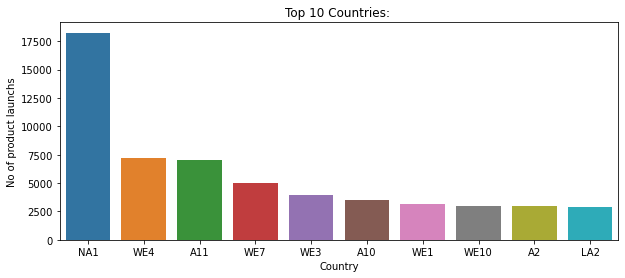

In [47]:
x = df_countries['Country'] [0:10]
y = df_countries['No of product launchs'][0:10]
sns.barplot(x,y)
fig = plt.gcf() #getcurrentfigure
fig.set_size_inches(10,4)
plt.title('Top 10 Countries: ')
plt.show()

In [48]:
print("Regions and their no of product launches")
df_regions = preprocessed_productLaunch[["Product id","Region"]].groupby("Region",as_index = False).agg({"Product id": "nunique"})
df_regions[["Region","No of product launchs"]]= df_regions
df_regions = df_regions.drop(columns = "Product id")
df_regions.sort_values(by = "No of product launchs", ascending = False,inplace = True)
print(df_regions.columns)
df_regions


Regions and their no of product launches
Index(['Region', 'No of product launchs'], dtype='object')


,Region,No of product launchs
7,West Europe,33218
1,Asia,27775
6,North America,20085
3,East Europe,11467
4,Latin America,9348
5,Middle East,5636
0,Africa,4790
2,Australasia,2370


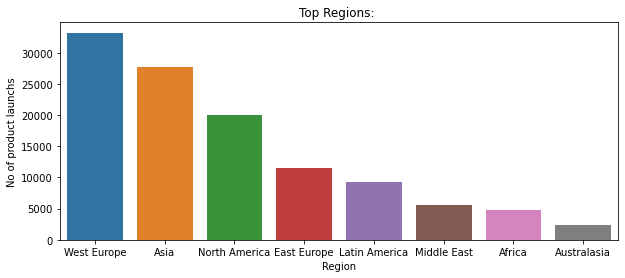

In [49]:
x = df_regions['Region'] [0:10]
y = df_regions['No of product launchs'][0:10]
sns.barplot(x,y)
fig = plt.gcf() #getcurrentfigure
fig.set_size_inches(10,4)
plt.title('Top Regions: ')
plt.show()

In [50]:
print("No of product launches Vs Year")
df_yearDistr = preprocessed_productLaunch[["Product id","Year (Calculated)"]].groupby("Year (Calculated)",as_index = False).agg({"Product id": "nunique"})
df_yearDistr[["Year (Calculated)","No of product launchs"]]= df_yearDistr
df_yearDistr = df_yearDistr.drop(columns = "Product id")
df_yearDistr.sort_values(by = "Year (Calculated)", ascending = False,inplace = True)
print(df_yearDistr.columns)
df_yearDistr


No of product launches Vs Year
Index(['Year (Calculated)', 'No of product launchs'], dtype='object')


,Year (Calculated),No of product launchs
9,2010,16834
8,2009,17813
7,2008,14135
6,2007,13492
5,2006,11151
4,2005,9169
3,2004,8005
2,2003,7900
1,2002,7757
0,2001,8433


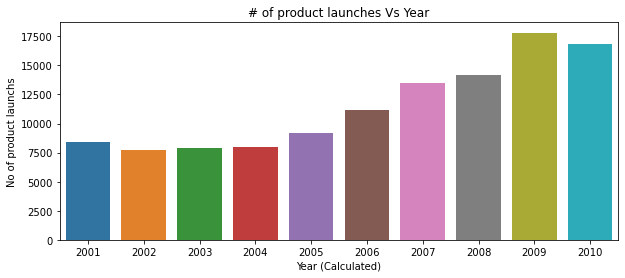

In [51]:
x = df_yearDistr['Year (Calculated)'] 
y = df_yearDistr['No of product launchs']
sns.barplot(x,y)
fig = plt.gcf() #getcurrentfigure
fig.set_size_inches(10,4)
plt.title('# of product launches Vs Year')
plt.show()

In [52]:
print("Flavors distribution across products")
df_flavorsDistr = preprocessed_productLaunch[["Product id","Flavor (Calculated)"]][preprocessed_productLaunch['Flavor (Calculated)'] != 'unflavored'].groupby("Flavor (Calculated)",as_index = False).agg({"Product id": "nunique"})
df_flavorsDistr[["Flavor (Calculated)","No of product launchs"]]= df_flavorsDistr
df_flavorsDistr = df_flavorsDistr.drop(columns = "Product id")
df_flavorsDistr.sort_values(by = "No of product launchs", ascending = False,inplace = True)
print(df_flavorsDistr.columns)
df_flavorsDistr


Flavors distribution across products
Index(['Flavor (Calculated)', 'No of product launchs'], dtype='object')


,Flavor (Calculated),No of product launchs
265,orange,14386
10,apple,12201
373,tea,11020
208,lemon,8912
358,superfruit,6357
...,...,...
206,laurel,1
214,linden blossom,1
216,litchi,1
221,mabolo,1


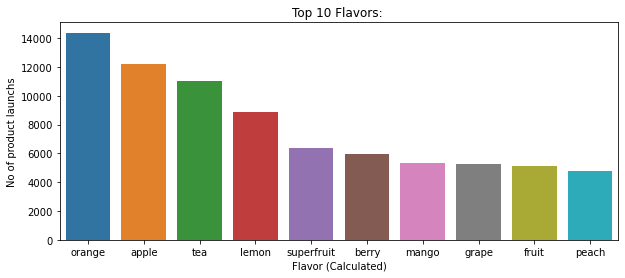

In [53]:
x = df_flavorsDistr['Flavor (Calculated)'] [0:10]
y = df_flavorsDistr['No of product launchs'][0:10]
sns.barplot(x,y)
fig = plt.gcf() #getcurrentfigure
fig.set_size_inches(10,4)
plt.title('Top 10 Flavors: ')
plt.show()

top10_flavors = df_flavorsDistr['Flavor (Calculated)'] [0:10]

In [54]:
print("Flavors types distribution across products")
df_flavorsTypeDistr = preprocessed_productLaunch[["Product id","Flavor type (Calculated)"]].groupby("Flavor type (Calculated)",as_index = False).agg({"Product id": "nunique"})
df_flavorsTypeDistr[["Flavor type (Calculated)","No of product launchs"]]= df_flavorsTypeDistr
df_flavorsTypeDistr = df_flavorsTypeDistr.drop(columns = "Product id")
df_flavorsTypeDistr.sort_values(by = "No of product launchs", ascending = False,inplace = True)
print(df_flavorsTypeDistr.columns)
df_flavorsTypeDistr


Flavors types distribution across products
Index(['Flavor type (Calculated)', 'No of product launchs'], dtype='object')


,Flavor type (Calculated),No of product launchs
186,none,64716
187,not specified,40835
216,red,15143
114,green,5321
208,pomegranate,2826
...,...,...
39,buckthorn,1
162,mascarpone,1
161,marzen,1
158,marsala,1


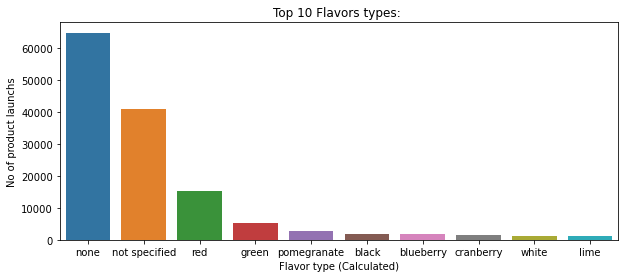

In [55]:
x = df_flavorsTypeDistr['Flavor type (Calculated)'] [0:10]
y = df_flavorsTypeDistr['No of product launchs'][0:10]
sns.barplot(x,y)
fig = plt.gcf() #getcurrentfigure
fig.set_size_inches(10,4)
plt.title('Top 10 Flavors types: ')
plt.show()


#### Bi-Variant Analysis

In [56]:
print("No of product launches Vs Year Vs Month")
df_MonthDistr = preprocessed_productLaunch[["Product id","Year (Calculated)","Month (Calculated)"]].groupby(["Year (Calculated)","Month (Calculated)"],as_index = False,sort = True).agg({"Product id": "nunique"})
#df_MonthDistr[["Year (Calculated)","No of product launchs"]]= df_MonthDistr
#df_MonthDistr = df_MonthDistr.drop(columns = "Product id")
#df_MonthDistr.sort_values(by = "Year (Calculated)", ascending = False,inplace = True)
#print(df_MonthDistr.columns)
df_MonthDistr

No of product launches Vs Year Vs Month


,Year (Calculated),Month (Calculated),Product id
0,2001,January,8433
1,2002,January,7757
2,2003,January,7900
3,2004,January,8005
4,2005,January,9169
5,2006,January,11151
6,2007,January,13492
7,2008,January,14135
8,2009,January,17813
9,2010,January,16834


In [57]:
preprocessed_productLaunch["Month (Calculated)"].nunique()

1

#### Observation:
- Only January data is available in given dataset

In [58]:
preprocessed_productLaunch.head(4)

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning,Flavor (Calculated),Flavor type (Calculated),Positioning Subcategory (Calculated),Month (Calculated),Year (Calculated)
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",herbs,not specified,Low Calorie,January,2001
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",herbs,not specified,Natural,January,2001
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",fruit,not specified,Low Calorie,January,2001
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",fruit,not specified,Natural,January,2001


In [59]:
print("Understanding mapping of Flavor and Flavor types")
invalid_entries = ["", " ", "none", "not specified"]
df_flavor_flavortypes = preprocessed_productLaunch[["Product id","Flavor (Calculated)","Flavor type (Calculated)"]][~preprocessed_productLaunch['Flavor type (Calculated)'].isin(invalid_entries)]
#df_flavor_flavortypes = df_flavor_flavortypes [~preprocessed_productLaunch['Flavor type (Calculated)'].isin(invalid_entries)]
df_flavor_flavortypes= df_flavor_flavortypes.groupby(["Flavor (Calculated)","Flavor type (Calculated)"],as_index = False,sort = True, dropna = True).agg({"Product id": "nunique"})
df_flavor_flavortypes[["Flavor (Calculated)","Flavor type (Calculated)","No of product launchs"]]= df_flavor_flavortypes
df_flavor_flavortypes = df_flavor_flavortypes.drop(columns = "Product id")
#df_flavor_flavortypes.sort_values(by = "No of product launchs", ascending = False,inplace = True)
print(df_flavor_flavortypes.columns)
df_flavor_flavortypes

Understanding mapping of Flavor and Flavor types
Index(['Flavor (Calculated)', 'Flavor type (Calculated)',
       'No of product launchs'],
      dtype='object')


,Flavor (Calculated),Flavor type (Calculated),No of product launchs
0,apple,golden,27
1,apple,granny smith,30
2,apple,green,1667
3,apple,red,10544
4,asparagus,green,2
...,...,...,...
338,wine,sangria,3
339,wine,sauvignon blanc,1
340,wine,shiraz,1
341,wine,white,7


In [60]:
top_flavors = list(top10_flavors[0:11])

In [61]:
df_flavor_flavortypes[df_flavor_flavortypes['Flavor (Calculated)'].isin(top_flavors)].pivot(index='Flavor (Calculated)', columns='Flavor type (Calculated)', values='No of product launchs')

Flavor type (Calculated),acai,acerola,agave,aronia (chokeberry(,aronia (chokeberry),assam,baobab,barberry,berry- blackberry,bitter,...,sweet,valencia,verbena,white,wildberry,wineberry,woodberry,yacon,yumberry,yuzu
Flavor (Calculated),,,,,,,,,,,,,,,,,,,,,
apple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
berry,NaN,NaN,NaN,1.0,153.0,NaN,NaN,2.0,428.0,NaN,...,NaN,NaN,NaN,NaN,192.0,1.0,1.0,NaN,NaN,NaN
fruit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,681.0,NaN,NaN,NaN,NaN,NaN,NaN
lemon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mango,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
orange,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
peach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.0,NaN,NaN,NaN,NaN,NaN,NaN
superfruit,841.0,327.0,127.0,NaN,NaN,NaN,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,50.0,62.0


In [62]:
print("Understanding mapping of Flavor and No of Flavor types")
invalid_entries = ["", " ", "none", "not specified"]
df_flavor_flavortypes2 = preprocessed_productLaunch[["Flavor (Calculated)","Flavor type (Calculated)"]][~preprocessed_productLaunch['Flavor type (Calculated)'].isin(invalid_entries)]
#df_flavor_flavortypes = df_flavor_flavortypes [~preprocessed_productLaunch['Flavor type (Calculated)'].isin(invalid_entries)]
df_flavor_flavortypes2= df_flavor_flavortypes2.groupby(["Flavor (Calculated)"],as_index = False, dropna = True).agg({"Flavor type (Calculated)": "nunique"})
df_flavor_flavortypes2[["Flavor (Calculated)","No of Flavor types"]]= df_flavor_flavortypes2
df_flavor_flavortypes2 = df_flavor_flavortypes2.drop(columns = "Flavor type (Calculated)")
df_flavor_flavortypes2.sort_values(by = "No of Flavor types", ascending = False,inplace = True)
print(df_flavor_flavortypes2.columns)
df_flavor_flavortypes2

Understanding mapping of Flavor and No of Flavor types
Index(['Flavor (Calculated)', 'No of Flavor types'], dtype='object')


,Flavor (Calculated),No of Flavor types
68,superfruit,42
9,berry,20
69,tea,20
20,coffee,18
75,wine,13
...,...,...
36,lettuce,1
35,lemonade,1
15,chicken,1
57,rum,1


In [63]:
df_flavor_flavortypes[df_flavor_flavortypes['Flavor (Calculated)'] == 'superfruit'].pivot(index='Flavor (Calculated)', columns='Flavor type (Calculated)', values='No of product launchs')

Flavor type (Calculated),acai,acerola,agave,baobab,cactus,caja,calamansi,camu camu,carambola,carambola/starfruit,...,pawpaw,pomegranate,pomelo,quince,seabuckthorn,soursop & guanabana,starfruit,yacon,yumberry,yuzu
Flavor (Calculated),,,,,,,,,,,,,,,,,,,,,
superfruit,841,327,127,16,69,9,108,9,16,2,...,9,2826,109,71,90,173,28,1,50,62


In [64]:
print("Top 10 flavors and no of types they have")
df_flavor_flavortypes2[df_flavor_flavortypes2['Flavor (Calculated)'].isin(top_flavors)]

Top 10 flavors and no of types they have


,Flavor (Calculated),No of Flavor types
68,superfruit,42
9,berry,20
69,tea,20
47,orange,6
28,grape,5
0,apple,4
34,lemon,3
24,fruit,2
39,mango,1
49,peach,1


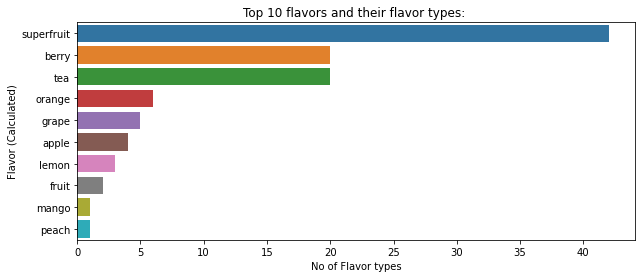

In [65]:
x = df_flavor_flavortypes2[df_flavor_flavortypes2['Flavor (Calculated)'].isin(top_flavors)]['Flavor (Calculated)']
y = df_flavor_flavortypes2[df_flavor_flavortypes2['Flavor (Calculated)'].isin(top_flavors)]['No of Flavor types']
sns.barplot(y,x)
fig = plt.gcf() #getcurrentfigure
fig.set_size_inches(10,4)
plt.title('Top 10 flavors and their flavor types: ')
plt.show()

# Preliminary Analysis of dataset: Positional_Category_Mapping_Dataset

In [66]:
print("creating the dataframe from Positional_Category_Mapping_Dataset.csv file..")
df_positonal_category_mapping = pd.read_csv('Positional_Category_Mapping_Dataset.csv') 
print('Done.\n')

creating the dataframe from Positional_Category_Mapping_Dataset.csv file..
Done.



In [67]:
df_positonal_category_mapping.head(10)

,Positioning Group,Positioning Subcategory
0,Age,Children (5-12 years)
1,Age,Seniors (55+)
2,Others,Economy
3,Choice,Halal
4,Choice,Kosher
5,Choice,Vegetarian
6,Co-Branding,Co-Branding
7,Supplements,Anti-Cancer
8,Supplements,Blood Pressure
9,Supplements,Bone Health (Supplements)


##### Basic Stats:

In [68]:
print("Total data ")
print("-"*50)
print("No of unique Positioning SubCategories available:" ,df_positonal_category_mapping["Positioning Subcategory"].nunique())
print("No of unique Positioning Groups available:" ,df_positonal_category_mapping["Positioning Group"].nunique())

Total data 
--------------------------------------------------
No of unique Positioning SubCategories available: 113
No of unique Positioning Groups available: 16


##### Data Quality Check:
- Check for duplicates: if positioning subcategory have duplicates
- Check and validate NaN values 

In [69]:
df_positonal_category_mapping['dup_bool'] = df_positonal_category_mapping.duplicated(["Positioning Subcategory"])
dups = sum(df_positonal_category_mapping['dup_bool']) # by considering Product ids...
print("There are {} duplicate rating entries in the data w.r.t sub-categories..".format(dups))

There are 1 duplicate rating entries in the data w.r.t sub-categories..


In [70]:
df_positonal_category_mapping

,Positioning Group,Positioning Subcategory,dup_bool
0,Age,Children (5-12 years),False
1,Age,Seniors (55+),False
2,Others,Economy,False
3,Choice,Halal,False
4,Choice,Kosher,False
...,...,...,...
109,Ethical,Ethical - Not Specific,False
110,Ethical,Ethical - Packaging,False
111,Choice,GMO Free,False
112,Age,Pregnancy/Breastfeeding - Formulas,False


In [71]:
preprocessed_productLaunch [preprocessed_productLaunch['Positioning Subcategory (Calculated)'] == 'Pregnancy/Breastfeeding - Formulas']

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning,Flavor (Calculated),Flavor type (Calculated),Positioning Subcategory (Calculated),Month (Calculated),Year (Calculated)


In [72]:
df_positonal_category_mapping = df_positonal_category_mapping.drop(columns = "dup_bool")

### Observation:
- sub-category:"Pregnancy/Breastfeeding - Formulas" is mapped to 2 groups:"Age, Supplements" but fortunately "Pregnancy/Breastfeeding - Formulas" is not found in our Product Lauch Dataset. Hence no data correction need in mapping data

In [73]:
print("No of columns found with NaNs : ", sum(df_positonal_category_mapping.isnull().any()))

No of columns found with NaNs :  0


#### Analysis:

In [74]:
print("No of subcategories of each Positioning Group")
df_subcategories = df_positonal_category_mapping[["Positioning Group", "Positioning Subcategory"]].groupby("Positioning Group",as_index = False).agg({"Positioning Subcategory": "nunique"})
df_subcategories[["Positioning Group", "No of sub-categories"]]= df_subcategories
df_subcategories = df_subcategories.drop(columns = "Positioning Subcategory")
df_subcategories.sort_values(by = "No of sub-categories", ascending = False,inplace = True)
print(df_subcategories.columns)
df_subcategories

No of subcategories of each Positioning Group
Index(['Positioning Group', 'No of sub-categories'], dtype='object')


,Positioning Group,No of sub-categories
15,Supplements,24
8,Health (Active),22
9,Health (Passive),22
11,Others,7
0,Age,6
3,Convenience,5
6,Ethical,5
10,Juice,5
1,Choice,4
12,Pleasure,4


# Preliminary Analysis of dataset: Flavor_Classification_Dataset

In [75]:
print("creating the dataframe from Positional_Category_Mapping_Dataset.csv file..")
df_flavor_classification = pd.read_csv('Flavor_Classification_Dataset.csv') 
print('Done.\n')

creating the dataframe from Positional_Category_Mapping_Dataset.csv file..
Done.



In [76]:
df_flavor_classification.head(10)

,Flavor_Group,Flavor
0,Alcohol,"Vodka, Citron"
1,Alcohol,Bacardi
2,Alcohol,"Bacardi, Gold"
3,Alcohol,"Bacardi, Silver"
4,Alcohol,"Beer, Ale"
5,Alcohol,"Beer, Amber"
6,Alcohol,"Beer, Amber Ale"
7,Alcohol,"Beer, Amstel"
8,Alcohol,"Beer, Black"
9,Alcohol,"Beer, Blonde"


### Pre-processing

#### Split Flavor column to Flovor and its type

In [77]:
df_flavor_classification[['Flavor (Calculated)','Flavor type (Calculated)']] = df_flavor_classification['Flavor'].str.split(',',n=1, expand=True)

In [78]:
df_flavor_classification.head(10)

,Flavor_Group,Flavor,Flavor (Calculated),Flavor type (Calculated)
0,Alcohol,"Vodka, Citron",Vodka,Citron
1,Alcohol,Bacardi,Bacardi,None
2,Alcohol,"Bacardi, Gold",Bacardi,Gold
3,Alcohol,"Bacardi, Silver",Bacardi,Silver
4,Alcohol,"Beer, Ale",Beer,Ale
5,Alcohol,"Beer, Amber",Beer,Amber
6,Alcohol,"Beer, Amber Ale",Beer,Amber Ale
7,Alcohol,"Beer, Amstel",Beer,Amstel
8,Alcohol,"Beer, Black",Beer,Black
9,Alcohol,"Beer, Blonde",Beer,Blonde


In [79]:
df_flavor_flavor_group = df_flavor_classification[['Flavor_Group','Flavor (Calculated)']].groupby("Flavor (Calculated)",as_index = False).max()

In [80]:
df_flavor_flavor_group["Flavor (Calculated)"] = df_flavor_flavor_group["Flavor (Calculated)"].apply( lambda x: (str(x).lower()))

In [81]:
df_flavor_flavor_group

,Flavor (Calculated),Flavor_Group
0,abiu,Fruit
1,acacia,Herbs
2,akee,Fruit
3,al pastor,Ethnic
4,alfalfa,Vegetable
...,...,...
629,yogurt,Dairy Flavors
630,yuca,Vegetable
631,yucca,Vegetable
632,zambuca,Alcohol


#### Basic Stats:

In [82]:
print("Total data ")
print("-"*50)
print("No of unique Flavors Groups:" ,df_flavor_classification["Flavor_Group"].nunique())
print("No of unique Flavors available:" ,df_flavor_classification["Flavor (Calculated)"].nunique())
print("No of unique Flavors Types available:" ,df_flavor_classification["Flavor type (Calculated)"].nunique())

Total data 
--------------------------------------------------
No of unique Flavors Groups: 22
No of unique Flavors available: 634
No of unique Flavors Types available: 632


#### Data Quality Check:
- Check for duplicates/Nulls: No point of checking duplicates as flavors and flavor type will definitely have duplicated and Nones 


#### Analysis:

In [83]:
print("No of Flavors of each Flavor Group")
df_flavorGroups = df_flavor_classification[["Flavor_Group", "Flavor (Calculated)"]].groupby("Flavor_Group",as_index = False).agg({"Flavor (Calculated)": "nunique"})
df_flavorGroups[["Flavor_Group", "No of Flavors"]]= df_flavorGroups
df_flavorGroups = df_flavorGroups.drop(columns = "Flavor (Calculated)")
df_flavorGroups.sort_values(by = "No of Flavors", ascending = False,inplace = True)
print(df_flavorGroups.columns)
df_flavorGroups

No of Flavors of each Flavor Group
Index(['Flavor_Group', 'No of Flavors'], dtype='object')


,Flavor_Group,No of Flavors
7,Fruit,161
21,Vegetable,123
17,Spices & Seeds,52
4,Ethnic,47
1,Brown Flavors,42
9,Herbs,39
13,"Poultry, meat, fish",38
0,Alcohol,31
15,Sauce & Condiment,21
3,Dairy Flavors,19


# Merging Datasets:

#### Merging Product Launch and Positioning Mapping Datasets

In [84]:
preprocessed_productLaunch.shape

(505612, 12)

In [85]:
df_merge_launchAndPositionMapping = preprocessed_productLaunch.merge(df_positonal_category_mapping,how = 'left',left_on = 'Positioning Subcategory (Calculated)', right_on = 'Positioning Subcategory')
df_merge_launchAndPositionMapping.head(5)

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning,Flavor (Calculated),Flavor type (Calculated),Positioning Subcategory (Calculated),Month (Calculated),Year (Calculated),Positioning Group,Positioning Subcategory
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",herbs,not specified,Low Calorie,January,2001,Health (Passive),Low Calorie
1,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",herbs,not specified,Natural,January,2001,Health (Passive),Natural
2,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",fruit,not specified,Low Calorie,January,2001,Health (Passive),Low Calorie
3,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",fruit,not specified,Natural,January,2001,Health (Passive),Natural
4,2,"Fruit, not specified",Carbonates,2001-01-01,WE2,West Europe,Convenience - Consumption,fruit,not specified,Convenience - Consumption,January,2001,Convenience,Convenience - Consumption


In [86]:
df_merge_launchAndPositionMapping[df_merge_launchAndPositionMapping['Positioning Subcategory'] == " "]

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning,Flavor (Calculated),Flavor type (Calculated),Positioning Subcategory (Calculated),Month (Calculated),Year (Calculated),Positioning Group,Positioning Subcategory


- No nulls found. Which means merging successfull and we have successfully added Positioning Group info

In [87]:
df_merge_launchAndPositionMapping.shape

(505612, 14)

#### Merging Flavor Classification Datasets

In [88]:
df_final_preprocessed_data = df_merge_launchAndPositionMapping.merge(df_flavor_flavor_group,how = 'left',left_on = 'Flavor (Calculated)', right_on = 'Flavor (Calculated)')
df_final_preprocessed_data.head(5)

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning,Flavor (Calculated),Flavor type (Calculated),Positioning Subcategory (Calculated),Month (Calculated),Year (Calculated),Positioning Group,Positioning Subcategory,Flavor_Group
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",herbs,not specified,Low Calorie,January,2001,Health (Passive),Low Calorie,Herbs
1,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",herbs,not specified,Natural,January,2001,Health (Passive),Natural,Herbs
2,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",fruit,not specified,Low Calorie,January,2001,Health (Passive),Low Calorie,Fruit
3,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",fruit,not specified,Natural,January,2001,Health (Passive),Natural,Fruit
4,2,"Fruit, not specified",Carbonates,2001-01-01,WE2,West Europe,Convenience - Consumption,fruit,not specified,Convenience - Consumption,January,2001,Convenience,Convenience - Consumption,Fruit


In [89]:
df_final_preprocessed_data[df_final_preprocessed_data['Flavor_Group'] == ""]

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning,Flavor (Calculated),Flavor type (Calculated),Positioning Subcategory (Calculated),Month (Calculated),Year (Calculated),Positioning Group,Positioning Subcategory,Flavor_Group


#### Dropping off redundant columns in final preprocessed dataset

In [90]:
df_final_preprocessed_data = df_final_preprocessed_data.drop(columns ="Positioning Subcategory (Calculated)")

- No nulls found. Which means merging successfull and we have successfully added Flavor Group info

# Final Preprocessed Data 

In [91]:
df_final_preprocessed_data.head(10)

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning,Flavor (Calculated),Flavor type (Calculated),Month (Calculated),Year (Calculated),Positioning Group,Positioning Subcategory,Flavor_Group
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",herbs,not specified,January,2001,Health (Passive),Low Calorie,Herbs
1,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",herbs,not specified,January,2001,Health (Passive),Natural,Herbs
2,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",fruit,not specified,January,2001,Health (Passive),Low Calorie,Fruit
3,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",fruit,not specified,January,2001,Health (Passive),Natural,Fruit
4,2,"Fruit, not specified",Carbonates,2001-01-01,WE2,West Europe,Convenience - Consumption,fruit,not specified,January,2001,Convenience,Convenience - Consumption,Fruit
5,3,Lemon; Honey; Ginger,Juice & Juice Drinks,2001-01-01,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu...",lemon,none,January,2001,Juice,100% Not from Concentrate,Fruit
6,3,Lemon; Honey; Ginger,Juice & Juice Drinks,2001-01-01,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu...",lemon,none,January,2001,Convenience,Convenience - Consumption,Fruit
7,3,Lemon; Honey; Ginger,Juice & Juice Drinks,2001-01-01,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu...",lemon,none,January,2001,Health (Passive),Natural,Fruit
8,3,Lemon; Honey; Ginger,Juice & Juice Drinks,2001-01-01,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu...",honey,none,January,2001,Juice,100% Not from Concentrate,Brown Flavors
9,3,Lemon; Honey; Ginger,Juice & Juice Drinks,2001-01-01,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu...",honey,none,January,2001,Convenience,Convenience - Consumption,Brown Flavors


In [92]:
print("# of rows in final preprocessed data: ", df_final_preprocessed_data.shape[0])
print("# of columns in final preprocessed data: ", df_final_preprocessed_data.shape[1])

# of rows in final preprocessed data:  505612
# of columns in final preprocessed data:  14


In [93]:
#Exporting pre-processed data to csv file 
#Uncomment below code this if you want to export csv
#df_final_preprocessed_data.to_csv("final_preprocessed_data.csv") 